To start, we need to import the modules we'll need later and provide a valid email address to use with Entrez.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Entrez
import csv
from collections import defaultdict

In [2]:
Entrez.email = 'kalawson@vassar.edu'

Next, we decide what we want to search for and open an API to access PubMed data, using ESearch to allow us to retrieve full records from PubMed.  Below, define the keyword you want to search for.  It should be formatted 'like+this'.  A search term for alcohol addiction has been given as an example.  You can also search in a specific area, like in the title, list of authors ('AuthorList'), or journal in which the article was published ('FullJournalName') and specify the range of years you're interested in.

In [14]:
keyword = 'alcoholism'
area = 'Title'
start_year_range = '2005'
end_year_range = '2015'

ESearch gives us a lot of information, but it's in the form of ID numbers, not titles, authors, or any other relevant information.  To make it easier to read, we'll use ESummary to search PubMed using the ID numbers we got from ESearch.

In [26]:
def search_pubmed(keyword, area, start_year_range, end_year_range):
    """Function to search PubMed for a user defined keyword, in a user defined area and time frame.  Output is a list of up to 20 papers that fit these specifications, formated as dictionaries containing information on authors, publication date, number of citations, and other relevant attributes."""
    handle = Entrez.esearch(db='pubmed', term=keyword, field = area, retmode='xml', idtype='acc', mindate=start_year_range, maxdate=end_year_range)
    data = Entrez.read(handle)
        
    UID = data['IdList']
    
    attributes_list = []
    
    for ID in range(len(UID)):
        record = Entrez.esummary(db='pubmed', id=UID[ID])
        attributes_list.append(Entrez.read(record))

    return attributes_list

In [34]:
attributes_list = search_pubmed(keyword, area, start_year_range, end_year_range)

This returns all the attributes for the most recent articles published in PubMed that include our keyword.  We can compile these attributes into a .csv file to make them easy to share.

In [35]:
csv_columns = ['Item','Id','PubDate', 'EPubDate', 'Source', 'AuthorList', 'LastAuthor', 'Title', 'Volume', 'Issue', 'Pages', 'LangList', 'NlmUniqueID', 'ISSN', 'ESSN', 'PubTypeList', 'RecordStatus', 'PubStatus', 'ArticleIds', 'DOI', 'History', 'References', 'HasAbstract', 'PmcRefCount', 'FullJournalName', 'ELocationID', 'SO']
dict_data = attributes_list
csv_file = "PubMed_Output.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for info in dict_data:
            for attribute_info in info:
                writer.writerow(attribute_info)
except IOError:
    print("I/O error")

After formatting the citation and putting it into a .csv file, we can to display the data as a bar graph of number of references for each of the articles.

In [36]:
citation = defaultdict(list)

for cite in attributes_list: 
    for attribute_cite in cite:
        for key, value in attribute_cite.items():
            citation[key].append(value)

print(citation['LastAuthor'])

['Pascual Pastor F', 'Varodayan F', 'Liu H', 'Pitel AL', 'Wan GR', 'Naegle M', 'Dabur R', 'Porjesz B', 'Desmond JE', 'Ben Hadj Ali B', 'Cservenka A', 'Sinha R', 'Choate PW', 'Nau JY', 'Petrakis IL', 'Stefanski R', 'Theiss JA', 'Serecigni JG', 'Fang YW', 'Bermpohl F']


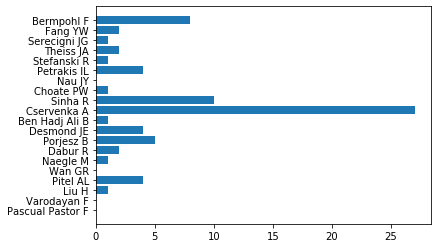

In [37]:
attribute_data_plot = plt.barh(citation['LastAuthor'], citation['PmcRefCount'])
plt.ylabel = 'Number of References'
plt.xlabel = 'Author'
plt.title = 'Number of References by Author'
plt.show()

Alternatively, if you chose to search by author instead of title at the top, you can display a bar graph to see that author's most cited works.

In [11]:
#author_data  = plt.barh(citation['Title'], citation['PmcRefCount'])
#plt.ylabel = 'Number of References'
#plt.xlabel = 'Title'
#plt.title = "Most Cited Publications"
#plt.show()